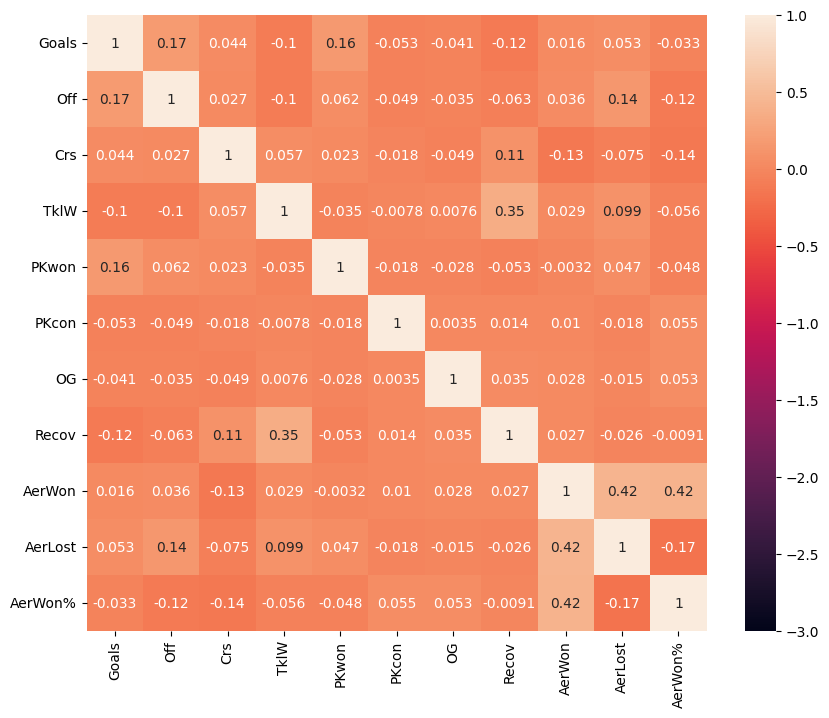

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV
datos = pd.read_csv("conjunto_entrenamiento.csv")

# crear un mapa de calor, el csv contiene muchos datos que son cadenas asi que solo se tomaran en cuenta los datos numericos
datos_numericos = datos.select_dtypes(include=['number'])

# seleccionar siempre la primera columna y las columnas del 25 al 50
atributo = 8
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(0, 10))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(10, 20))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(20, 30))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(30, 40))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(40, 50))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(50, 60))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(60, 70))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(70, 80))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(80, 90))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(90, 100))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(100, 110))]
columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(110, 120))]

# Calcular la correlación
correlaciones = columnas_numericas.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura
sns.heatmap(correlaciones, annot=True, vmin=-3, vmax=1)

plt.show()


In [181]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el archivo CSV
datos_entrenamiento = pd.read_csv("conjunto_entrenamiento.csv")
datos_prueba = pd.read_csv("conjunto_prueba.csv")

# Lista de características
caracteristicas = [
    "G/SoT", "G/Sh", "MP", "PKatt", "Pos", "Starts", "Min", "90s", 
    "Shots", "SoT%", "SoT", "TouAttPen", "RecProg", "GCA", "PasAss", "ToTkl%", 
    "ShoDist", "GcaFld", "PasLonCmp%", "PPA", "CarProg"
]
x_train = datos_entrenamiento[caracteristicas]
y_train = datos_entrenamiento['Goals']

x_test = datos_prueba[caracteristicas]
y_test = datos_prueba['Goals']

# Crear y entrenar el modelo de Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
# n_estimators: Número de árboles en el bosque. Más árboles pueden mejorar la precisión pero aumentan el tiempo de cálculo.
# random_state: Semilla utilizada por el generador de números aleatorios para asegurar la reproducibilidad de los resultados.

random_forest_model.fit(x_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = random_forest_model.predict(x_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

# Calcular la puntuación R^2
r2_score_value = r2_score(y_test, y_pred)
print("Puntuación R^2:", r2_score_value*100)
import pickle
file_model = open("PrediccionGolesDef9001.pkl", "wb")
with file_model as f:
    pickle.dump((model), f)

file_model.close()


Error cuadrático medio (MSE): 0.22872434944237915
Puntuación R^2: 94.17326555722977
